<a href="https://colab.research.google.com/github/abhi57075/Ransomware-Detection/blob/main/Ransomware_detectoin_ML_and_DL.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Collecting the data from gdrive and preprocessing it

In [ ]:
# Importing libraries required for data collection and data pre processing
import pandas as pd
import seaborn as sns

In [ ]:
# Mounting our google drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Reading our data
data = pd.read_csv('/content/drive/MyDrive/data_file.csv')

In [ ]:
data.shape

(62485, 18)

In [ ]:
# Gaining statistical information about our data
data.describe()

,Machine,DebugSize,DebugRVA,MajorImageVersion,MajorOSVersion,ExportRVA,ExportSize,IatVRA,MajorLinkerVersion,MinorLinkerVersion,NumberOfSections,SizeOfStackReserve,DllCharacteristics,ResourceSize,BitcoinAddresses,Benign
count,62485.000000,6.248500e+04,6.248500e+04,62485.000000,62485.000000,6.248500e+04,6.248500e+04,6.248500e+04,62485.000000,62485.000000,62485.000000,6.248500e+04,62485.000000,6.248500e+04,62485.000000,62485.000000
mean,6756.472657,2.587048e+04,1.541611e+05,58.785997,5.417524,8.953186e+05,4.094623e+05,1.466311e+05,9.782604,6.613171,4.751172,8.759830e+05,12966.031400,1.844664e+05,0.018004,0.433992
std,13345.499919,6.461396e+06,1.903142e+06,1114.068244,2.543697,3.779527e+07,2.851820e+07,1.124630e+06,9.047157,16.976465,2.138584,6.288189e+05,15762.725511,1.732625e+07,0.132968,0.495628
min,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,1.000000,0.000000e+00,0.000000,0.000000e+00,0.000000,0.000000
25%,332.000000,0.000000e+00,0.000000e+00,0.000000,4.000000,0.000000e+00,0.000000e+00,4.096000e+03,6.000000,0.000000,3.000000,2.621440e+05,0.000000,1.080000e+03,0.000000,0.000000
50%,332.000000,0.000000e+00,0.000000e+00,0.000000,5.000000,0.000000e+00,0.000000e+00,8.520000e+03,9.000000,0.000000,5.000000,1.048576e+06,320.000000,2.496000e+03,0.000000,0.000000
75%,332.000000,2.800000e+01,1.283200e+04,6.000000,6.000000,2.875200e+04,1.040000e+02,6.553600e+04,11.000000,10.000000,6.000000,1.048576e+06,32768.000000,2.350400e+04,0.000000,1.000000
max,43620.000000,1.615155e+09,2.852127e+08,63325.000000,260.000000,2.147484e+09,2.415919e+09,6.615450e+07,255.000000,255.000000,33.000000,1.677722e+07,58632.000000,4.294942e+09,1.000000,1.000000


In [ ]:
# Obtaining the types of values stored in our data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62485 entries, 0 to 62484
Data columns (total 18 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   FileName            62485 non-null  object
 1   md5Hash             62485 non-null  object
 2   Machine             62485 non-null  int64 
 3   DebugSize           62485 non-null  int64 
 4   DebugRVA            62485 non-null  int64 
 5   MajorImageVersion   62485 non-null  int64 
 6   MajorOSVersion      62485 non-null  int64 
 7   ExportRVA           62485 non-null  int64 
 8   ExportSize          62485 non-null  int64 
 9   IatVRA              62485 non-null  int64 
 10  MajorLinkerVersion  62485 non-null  int64 
 11  MinorLinkerVersion  62485 non-null  int64 
 12  NumberOfSections    62485 non-null  int64 
 13  SizeOfStackReserve  62485 non-null  int64 
 14  DllCharacteristics  62485 non-null  int64 
 15  ResourceSize        62485 non-null  int64 
 16  BitcoinAddresses    62

In [ ]:
# Checking the number of null values in our data corresponding to each column
data.isnull().sum()

FileName              0
md5Hash               0
Machine               0
DebugSize             0
DebugRVA              0
MajorImageVersion     0
MajorOSVersion        0
ExportRVA             0
ExportSize            0
IatVRA                0
MajorLinkerVersion    0
MinorLinkerVersion    0
NumberOfSections      0
SizeOfStackReserve    0
DllCharacteristics    0
ResourceSize          0
BitcoinAddresses      0
Benign                0
dtype: int64

In [ ]:
# Removing some columns from our data
drp_clm = ['FileName','md5Hash']
dataset = data.drop(columns =drp_clm, axis =1)

In [ ]:
# separating the dependent and the independent variables from our data
X= dataset.drop(columns='Benign', axis =1)
Y= dataset['Benign']

In [ ]:
print(X)

       Machine  DebugSize  DebugRVA  MajorImageVersion  MajorOSVersion  \
0          332          0         0                  0               4   
1        34404         84    121728                 10              10   
2          332          0         0                  0               4   
3        34404         84     19904                 10              10   
4        34404         84     97728                 10              10   
...        ...        ...       ...                ...             ...   
62480      332          0         0                  1               4   
62481      332          0         0                  7              10   
62482      332          0         0                  0               4   
62483      332          0         0                  0               4   
62484      332          0         0                  0               5   

       ExportRVA  ExportSize  IatVRA  MajorLinkerVersion  MinorLinkerVersion  \
0              0           0   

In [ ]:
print(Y)

0        1
1        1
2        1
3        1
4        1
        ..
62480    0
62481    0
62482    0
62483    0
62484    0
Name: Benign, Length: 62485, dtype: int64


# Train test split

In [ ]:
import numpy as np
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X,Y, test_size = 0.20, random_state = 1)

In [ ]:
print(X_train.shape)

(49988, 15)


# Random Forest Classifier model

In [ ]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

Epoch 10: Training Accuracy = 0.9813, Validation Accuracy = 0.9798
Epoch 20: Training Accuracy = 0.9858, Validation Accuracy = 0.9860
Epoch 30: Training Accuracy = 0.9853, Validation Accuracy = 0.9842
Epoch 40: Training Accuracy = 0.9838, Validation Accuracy = 0.9828
Epoch 50: Training Accuracy = 0.9872, Validation Accuracy = 0.9867
Epoch 60: Training Accuracy = 0.9864, Validation Accuracy = 0.9842
Epoch 70: Training Accuracy = 0.9862, Validation Accuracy = 0.9845
Epoch 80: Training Accuracy = 0.9871, Validation Accuracy = 0.9854
Epoch 90: Training Accuracy = 0.9849, Validation Accuracy = 0.9840
Epoch 100: Training Accuracy = 0.9859, Validation Accuracy = 0.9851


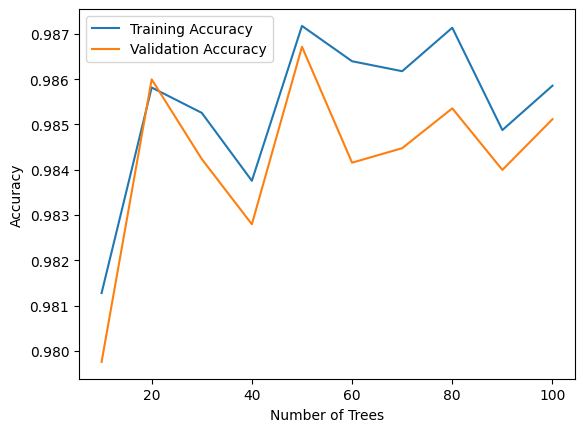

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
import matplotlib.pyplot as plt

n_estimators = 100
max_depth = 5

model_RFC = RandomForestClassifier(n_estimators=n_estimators, max_depth=max_depth)

training_accuracy = []
validation_accuracy = []

for epoch in range(10, n_estimators + 1, 10):
    model_RFC.set_params(n_estimators=epoch)
    model_RFC.fit(X_train, y_train)

    # Make predictions on the training set
    train_predictions = model_RFC.predict(X_train)

    # Make predictions on the validation set
    val_predictions = model_RFC.predict(X_test)

    # Calculate accuracy on training and validation sets
    train_accuracy = accuracy_score(y_train, train_predictions)
    val_accuracy = accuracy_score(y_test, val_predictions)

    # Store accuracy scores
    training_accuracy.append(train_accuracy)
    validation_accuracy.append(val_accuracy)

    print(f'Epoch {epoch}: Training Accuracy = {train_accuracy:.4f}, Validation Accuracy = {val_accuracy:.4f}')

# Plot the accuracy after every 10 epochs
plt.plot(range(10, n_estimators + 1, 10), training_accuracy, label='Training Accuracy')
plt.plot(range(10, n_estimators + 1, 10), validation_accuracy, label='Validation Accuracy')
plt.xlabel('Number of Trees')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


In [ ]:
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt

model_RFC = RandomForestClassifier(n_estimators = 500, max_depth = 5)
history1 = model_RFC.fit(X_train, y_train)
y_pred = model_RFC.predict(X_test)
print(f'Accuracy for Random Forest classifier model is : {accuracy_score(y_pred, y_test)}')
print(classification_report(y_pred,y_test))

Accuracy for Random Forest classifier model is : 0.9847163319196607
              precision    recall  f1-score   support

           0       0.99      0.98      0.99      7020
           1       0.97      0.99      0.98      5477

    accuracy                           0.98     12497
   macro avg       0.98      0.99      0.98     12497
weighted avg       0.98      0.98      0.98     12497



# Logistic Regression Model

Step 10: Training Accuracy = 0.5740, Validation Accuracy = 0.5737
Step 20: Training Accuracy = 0.7545, Validation Accuracy = 0.7519
Step 30: Training Accuracy = 0.7575, Validation Accuracy = 0.7526
Step 40: Training Accuracy = 0.7818, Validation Accuracy = 0.7828
Step 50: Training Accuracy = 0.8056, Validation Accuracy = 0.8040
Step 60: Training Accuracy = 0.8038, Validation Accuracy = 0.8035
Step 70: Training Accuracy = 0.8812, Validation Accuracy = 0.8742
Step 80: Training Accuracy = 0.8644, Validation Accuracy = 0.8639
Step 90: Training Accuracy = 0.8973, Validation Accuracy = 0.8929
Step 100: Training Accuracy = 0.9055, Validation Accuracy = 0.9032


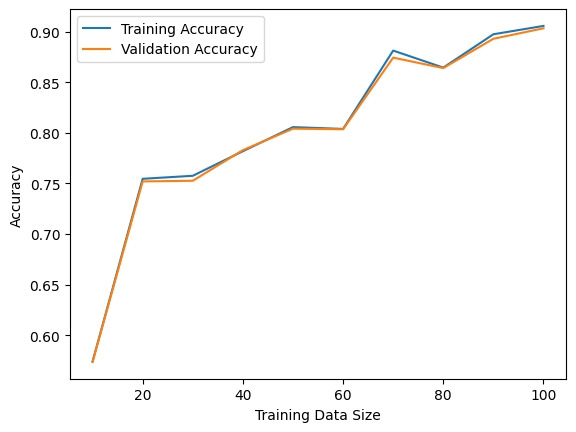

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import warnings
from sklearn.exceptions import ConvergenceWarning  # Import ConvergenceWarning

# Create a Logistic Regression classifier
model_LRC = LogisticRegression(max_iter=1000)  # Increase max_iter to avoid ConvergenceWarning

# Disable ConvergenceWarning
warnings.filterwarnings("ignore", category=ConvergenceWarning)

# Lists to store accuracy scores
training_accuracy = []
validation_accuracy = []

# Train the model incrementally and record accuracy after every step
for step in range(10, 101, 10):
    # Train the model with a subset of data
    model_LRC.fit(X_train[:step], y_train[:step])

    # Make predictions on the training set
    train_predictions = model_LRC.predict(X_train)

    # Make predictions on the validation set
    val_predictions = model_LRC.predict(X_test)

    # Calculate accuracy on training and validation sets
    train_accuracy = accuracy_score(y_train, train_predictions)
    val_accuracy = accuracy_score(y_test, val_predictions)

    # Store accuracy scores
    training_accuracy.append(train_accuracy)
    validation_accuracy.append(val_accuracy)

    print(f'Step {step}: Training Accuracy = {train_accuracy:.4f}, Validation Accuracy = {val_accuracy:.4f}')

# Plot the accuracy after every step
plt.plot(range(10, 101, 10), training_accuracy, label='Training Accuracy')
plt.plot(range(10, 101, 10), validation_accuracy, label='Validation Accuracy')
plt.xlabel('Training Data Size')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


In [ ]:
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt

model_LRC = LogisticRegression()
history1 = model_LRC.fit(X_train, y_train)
y_pred = model_LRC.predict(X_test)
print(f'Accuracy for Logistic Regression classifier model is : {accuracy_score(y_pred, y_test)}')
print(classification_report(y_pred,y_test))

Accuracy for Logistic Regression classifier model is : 0.7750660158438025
              precision    recall  f1-score   support

           0       0.93      0.74      0.82      8730
           1       0.59      0.87      0.70      3767

    accuracy                           0.78     12497
   macro avg       0.76      0.80      0.76     12497
weighted avg       0.82      0.78      0.78     12497



# Gaussian Naive Bayes Model




Step 10: Training Accuracy = 0.6038, Validation Accuracy = 0.6175
Step 20: Training Accuracy = 0.8172, Validation Accuracy = 0.8191
Step 30: Training Accuracy = 0.8164, Validation Accuracy = 0.8179
Step 40: Training Accuracy = 0.8139, Validation Accuracy = 0.8165
Step 50: Training Accuracy = 0.8191, Validation Accuracy = 0.8226
Step 60: Training Accuracy = 0.8201, Validation Accuracy = 0.8228
Step 70: Training Accuracy = 0.8198, Validation Accuracy = 0.8225
Step 80: Training Accuracy = 0.8181, Validation Accuracy = 0.8210
Step 90: Training Accuracy = 0.8177, Validation Accuracy = 0.8208
Step 100: Training Accuracy = 0.8170, Validation Accuracy = 0.8207


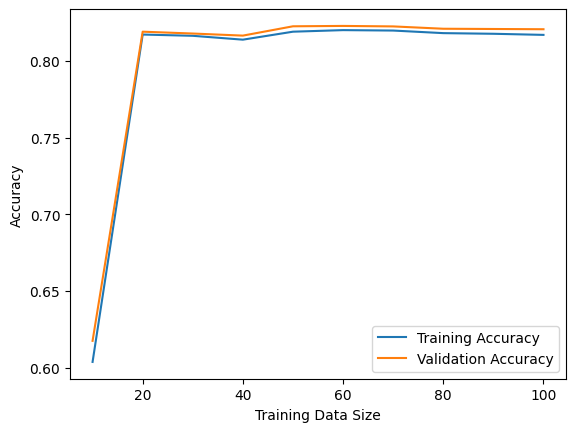

In [ ]:
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import warnings
from sklearn.exceptions import ConvergenceWarning  # Import ConvergenceWarning

# Create a Gaussian Naive Bayes classifier
model_GNB = GaussianNB()  # Increase max_iter to avoid ConvergenceWarning

# Disable ConvergenceWarning
warnings.filterwarnings("ignore", category=ConvergenceWarning)

# Lists to store accuracy scores
training_accuracy = []
validation_accuracy = []

# Train the model incrementally and record accuracy after every step
for step in range(10, 101, 10):
    # Train the model with a subset of data
    model_GNB.fit(X_train[:step], y_train[:step])

    # Make predictions on the training set
    train_predictions = model_GNB.predict(X_train)

    # Make predictions on the validation set
    val_predictions = model_GNB.predict(X_test)

    # Calculate accuracy on training and validation sets
    train_accuracy = accuracy_score(y_train, train_predictions)
    val_accuracy = accuracy_score(y_test, val_predictions)

    # Store accuracy scores
    training_accuracy.append(train_accuracy)
    validation_accuracy.append(val_accuracy)

    print(f'Step {step}: Training Accuracy = {train_accuracy:.4f}, Validation Accuracy = {val_accuracy:.4f}')

# Plot the accuracy after every step
plt.plot(range(10, 101, 10), training_accuracy, label='Training Accuracy')
plt.plot(range(10, 101, 10), validation_accuracy, label='Validation Accuracy')
plt.xlabel('Training Data Size')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


In [ ]:
from sklearn.naive_bayes import GaussianNB
import matplotlib.pyplot as plt

model_GNB = GaussianNB()
history1 = model_GNB.fit(X_train, y_train)
y_pred = model_GNB.predict(X_test)
print(f'Accuracy for Gaussian Naive Bayes classifier model is : {accuracy_score(y_pred, y_test)}')
print(classification_report(y_pred,y_test))

Accuracy for Gaussian Naive Bayes classifier model is : 0.4452268544450668
              precision    recall  f1-score   support

           0       0.00      0.46      0.00        28
           1       1.00      0.45      0.62     12469

    accuracy                           0.45     12497
   macro avg       0.50      0.45      0.31     12497
weighted avg       1.00      0.45      0.61     12497



# Support Vector Machine Model

Step 10: Training Accuracy = 0.7742, Validation Accuracy = 0.7789
Step 20: Training Accuracy = 0.7921, Validation Accuracy = 0.7968
Step 30: Training Accuracy = 0.7932, Validation Accuracy = 0.7974
Step 40: Training Accuracy = 0.7932, Validation Accuracy = 0.7976
Step 50: Training Accuracy = 0.7927, Validation Accuracy = 0.7971
Step 60: Training Accuracy = 0.7929, Validation Accuracy = 0.7972
Step 70: Training Accuracy = 0.7931, Validation Accuracy = 0.7976
Step 80: Training Accuracy = 0.7930, Validation Accuracy = 0.7966
Step 90: Training Accuracy = 0.7929, Validation Accuracy = 0.7971
Step 100: Training Accuracy = 0.7939, Validation Accuracy = 0.7977


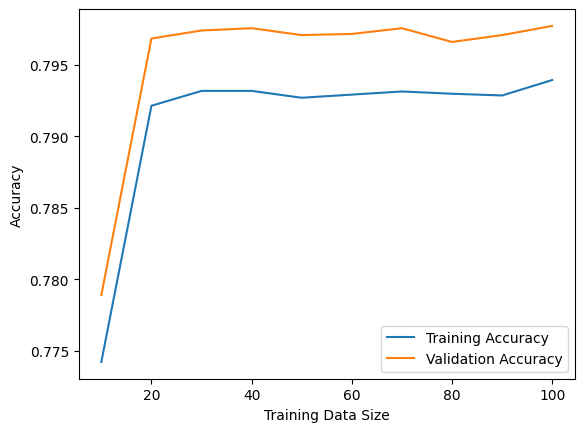

In [ ]:
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import warnings
from sklearn.exceptions import ConvergenceWarning  # Import ConvergenceWarning

# Create a Support Vector Machine classifier
model_SVC = SVC()  # Increase max_iter to avoid ConvergenceWarning

# Disable ConvergenceWarning
warnings.filterwarnings("ignore", category=ConvergenceWarning)

# Lists to store accuracy scores
training_accuracy = []
validation_accuracy = []

# Train the model incrementally and record accuracy after every step
for step in range(10, 101, 10):
    # Train the model with a subset of data
    model_SVC.fit(X_train[:step], y_train[:step])

    # Make predictions on the training set
    train_predictions = model_SVC.predict(X_train)

    # Make predictions on the validation set
    val_predictions = model_SVC.predict(X_test)

    # Calculate accuracy on training and validation sets
    train_accuracy = accuracy_score(y_train, train_predictions)
    val_accuracy = accuracy_score(y_test, val_predictions)

    # Store accuracy scores
    training_accuracy.append(train_accuracy)
    validation_accuracy.append(val_accuracy)

    print(f'Step {step}: Training Accuracy = {train_accuracy:.4f}, Validation Accuracy = {val_accuracy:.4f}')

# Plot the accuracy after every step
plt.plot(range(10, 101, 10), training_accuracy, label='Training Accuracy')
plt.plot(range(10, 101, 10), validation_accuracy, label='Validation Accuracy')
plt.xlabel('Training Data Size')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


In [ ]:
from sklearn.svm import SVC
import matplotlib.pyplot as plt

model_SVC = SVC()
history1 = model_SVC.fit(X_train, y_train)
y_pred = model_SVC.predict(X_test)
print(f'Accuracy for Support Vector classifier model is : {accuracy_score(y_pred, y_test)}')
print(classification_report(y_pred,y_test))

Accuracy for Support Vector classifier model is : 0.78514843562455
              precision    recall  f1-score   support

           0       0.94      0.74      0.83      8722
           1       0.60      0.88      0.71      3775

    accuracy                           0.79     12497
   macro avg       0.77      0.81      0.77     12497
weighted avg       0.83      0.79      0.79     12497



# Decision tree Model

Step 10: Training Accuracy = 0.6813, Validation Accuracy = 0.6862
Step 20: Training Accuracy = 0.8469, Validation Accuracy = 0.8487
Step 30: Training Accuracy = 0.8512, Validation Accuracy = 0.8548
Step 40: Training Accuracy = 0.9000, Validation Accuracy = 0.9024
Step 50: Training Accuracy = 0.9098, Validation Accuracy = 0.9104
Step 60: Training Accuracy = 0.9171, Validation Accuracy = 0.9155
Step 70: Training Accuracy = 0.9196, Validation Accuracy = 0.9185
Step 80: Training Accuracy = 0.9196, Validation Accuracy = 0.9185
Step 90: Training Accuracy = 0.9494, Validation Accuracy = 0.9506
Step 100: Training Accuracy = 0.9311, Validation Accuracy = 0.9285


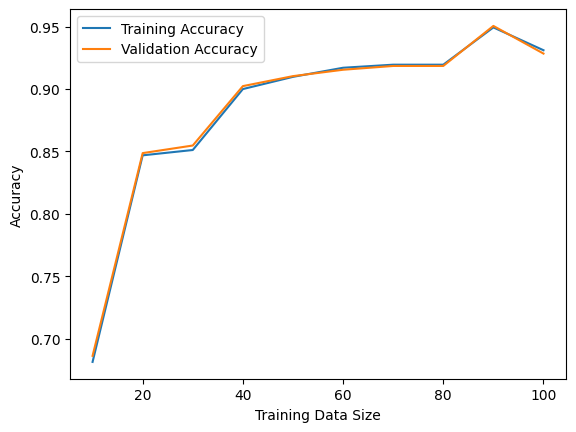

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import warnings
from sklearn.exceptions import ConvergenceWarning  # Import ConvergenceWarning

# Create a Decision tree classifier
model_DTC = DecisionTreeClassifier(max_leaf_nodes = 25, min_samples_split = 4, random_state = 42)  # Increase max_iter to avoid ConvergenceWarning

# Disable ConvergenceWarning
warnings.filterwarnings("ignore", category=ConvergenceWarning)

# Lists to store accuracy scores
training_accuracy = []
validation_accuracy = []

# Train the model incrementally and record accuracy after every step
for step in range(10, 101, 10):
    # Train the model with a subset of data
    model_DTC.fit(X_train[:step], y_train[:step])

    # Make predictions on the training set
    train_predictions = model_DTC.predict(X_train)

    # Make predictions on the validation set
    val_predictions = model_DTC.predict(X_test)

    # Calculate accuracy on training and validation sets
    train_accuracy = accuracy_score(y_train, train_predictions)
    val_accuracy = accuracy_score(y_test, val_predictions)

    # Store accuracy scores
    training_accuracy.append(train_accuracy)
    validation_accuracy.append(val_accuracy)

    print(f'Step {step}: Training Accuracy = {train_accuracy:.4f}, Validation Accuracy = {val_accuracy:.4f}')

# Plot the accuracy after every step
plt.plot(range(10, 101, 10), training_accuracy, label='Training Accuracy')
plt.plot(range(10, 101, 10), validation_accuracy, label='Validation Accuracy')
plt.xlabel('Training Data Size')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


In [ ]:
from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt

model_DTC = DecisionTreeClassifier(max_leaf_nodes = 25, min_samples_split = 4, random_state = 42)
history1 = model_DTC.fit(X_train, y_train)
y_pred = model_DTC.predict(X_test)
print(f'Accuracy for decision tree model is : {accuracy_score(y_pred, y_test)}')
print(classification_report(y_pred,y_test))

Accuracy for decision tree model is : 0.9847963511242698
              precision    recall  f1-score   support

           0       0.99      0.98      0.99      7019
           1       0.98      0.99      0.98      5478

    accuracy                           0.98     12497
   macro avg       0.98      0.99      0.98     12497
weighted avg       0.98      0.98      0.98     12497



# ADABoost Model

Step 10: Training Accuracy = 0.6052, Validation Accuracy = 0.6219
Step 20: Training Accuracy = 0.8211, Validation Accuracy = 0.8247
Step 30: Training Accuracy = 0.8963, Validation Accuracy = 0.8981
Step 40: Training Accuracy = 0.8806, Validation Accuracy = 0.8805
Step 50: Training Accuracy = 0.9151, Validation Accuracy = 0.9123
Step 60: Training Accuracy = 0.9081, Validation Accuracy = 0.9101
Step 70: Training Accuracy = 0.9380, Validation Accuracy = 0.9404
Step 80: Training Accuracy = 0.9305, Validation Accuracy = 0.9304
Step 90: Training Accuracy = 0.9356, Validation Accuracy = 0.9334
Step 100: Training Accuracy = 0.9517, Validation Accuracy = 0.9544


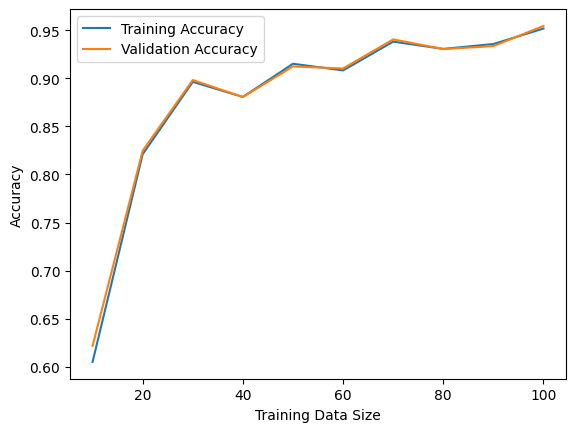

In [ ]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import warnings
from sklearn.exceptions import ConvergenceWarning  # Import ConvergenceWarning

# Create a AdaBoost classifier
model_ABC = AdaBoostClassifier()  # Increase max_iter to avoid ConvergenceWarning

# Disable ConvergenceWarning
warnings.filterwarnings("ignore", category=ConvergenceWarning)

# Lists to store accuracy scores
training_accuracy = []
validation_accuracy = []

# Train the model incrementally and record accuracy after every step
for step in range(10, 101, 10):
    # Train the model with a subset of data
    model_ABC.fit(X_train[:step], y_train[:step])

    # Make predictions on the training set
    train_predictions = model_ABC.predict(X_train)

    # Make predictions on the validation set
    val_predictions = model_ABC.predict(X_test)

    # Calculate accuracy on training and validation sets
    train_accuracy = accuracy_score(y_train, train_predictions)
    val_accuracy = accuracy_score(y_test, val_predictions)

    # Store accuracy scores
    training_accuracy.append(train_accuracy)
    validation_accuracy.append(val_accuracy)

    print(f'Step {step}: Training Accuracy = {train_accuracy:.4f}, Validation Accuracy = {val_accuracy:.4f}')

# Plot the accuracy after every step
plt.plot(range(10, 101, 10), training_accuracy, label='Training Accuracy')
plt.plot(range(10, 101, 10), validation_accuracy, label='Validation Accuracy')
plt.xlabel('Training Data Size')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


In [ ]:
from sklearn.ensemble import AdaBoostClassifier
import matplotlib.pyplot as plt

model_ABC = AdaBoostClassifier()
history1 = model_ABC.fit(X_train, y_train)
y_pred = model_ABC.predict(X_test)
print(f'Accuracy for ADA boost model is : {accuracy_score(y_pred, y_test)}')
print(classification_report(y_pred,y_test))

Accuracy for ADA boost model is : 0.981915659758342
              precision    recall  f1-score   support

           0       0.98      0.99      0.98      6909
           1       0.98      0.98      0.98      5588

    accuracy                           0.98     12497
   macro avg       0.98      0.98      0.98     12497
weighted avg       0.98      0.98      0.98     12497



# KNN Model

Step 10: Training Accuracy = 0.5689, Validation Accuracy = 0.5546
Step 20: Training Accuracy = 0.7463, Validation Accuracy = 0.7399
Step 30: Training Accuracy = 0.7734, Validation Accuracy = 0.7674
Step 40: Training Accuracy = 0.7921, Validation Accuracy = 0.7889
Step 50: Training Accuracy = 0.8055, Validation Accuracy = 0.8028
Step 60: Training Accuracy = 0.8659, Validation Accuracy = 0.8637
Step 70: Training Accuracy = 0.8669, Validation Accuracy = 0.8643
Step 80: Training Accuracy = 0.7811, Validation Accuracy = 0.7781
Step 90: Training Accuracy = 0.7853, Validation Accuracy = 0.7811
Step 100: Training Accuracy = 0.7940, Validation Accuracy = 0.7895


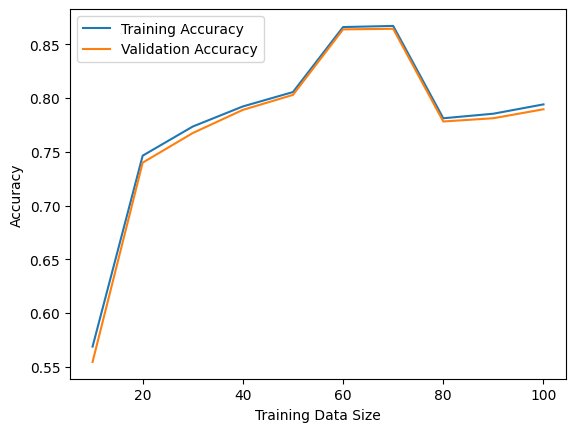

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import warnings
from sklearn.exceptions import ConvergenceWarning  # Import ConvergenceWarning

# Create a KNN model classifier
model_KNN = KNeighborsClassifier(n_neighbors = 10)  # Increase max_iter to avoid ConvergenceWarning

# Disable ConvergenceWarning
warnings.filterwarnings("ignore", category=ConvergenceWarning)

# Lists to store accuracy scores
training_accuracy = []
validation_accuracy = []

# Train the model incrementally and record accuracy after every step
for step in range(10, 101, 10):
    # Train the model with a subset of data
    model_KNN.fit(X_train[:step], y_train[:step])

    # Make predictions on the training set
    train_predictions = model_KNN.predict(X_train)

    # Make predictions on the validation set
    val_predictions = model_KNN.predict(X_test)

    # Calculate accuracy on training and validation sets
    train_accuracy = accuracy_score(y_train, train_predictions)
    val_accuracy = accuracy_score(y_test, val_predictions)

    # Store accuracy scores
    training_accuracy.append(train_accuracy)
    validation_accuracy.append(val_accuracy)

    print(f'Step {step}: Training Accuracy = {train_accuracy:.4f}, Validation Accuracy = {val_accuracy:.4f}')

# Plot the accuracy after every step
plt.plot(range(10, 101, 10), training_accuracy, label='Training Accuracy')
plt.plot(range(10, 101, 10), validation_accuracy, label='Validation Accuracy')
plt.xlabel('Training Data Size')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


In [ ]:
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt

model_KNN = KNeighborsClassifier(n_neighbors = 10)
history1 = model_KNN.fit(X_train, y_train)
y_pred = model_KNN.predict(X_test)
print(f'Accuracy for ADA boost model is : {accuracy_score(y_pred, y_test)}')
print(classification_report(y_pred,y_test))

Accuracy for ADA boost model is : 0.9730335280467313
              precision    recall  f1-score   support

           0       0.98      0.97      0.98      7052
           1       0.96      0.98      0.97      5445

    accuracy                           0.97     12497
   macro avg       0.97      0.97      0.97     12497
weighted avg       0.97      0.97      0.97     12497



# Our proposed architecture

1. We have used tenosrflow library to develop the ANN (Artificial Neural Network)

2. We have developed the model which has 3 hidden layers in which
  
  1st hidden layer has -> 20 neurons and activation function is "sigmoid"

  2nd hidden layer has -> 15 neurons and activation function is "sigmoid"

  3rd hidden layer has -> 10 neurons and activation function is "sigmoid"

3. We have used sigmoid activation funciton as it gives better result for binary class classification and if this was a multiclass classification model we would have used softmax activation function

4. Here the number of epochs we have used is 50


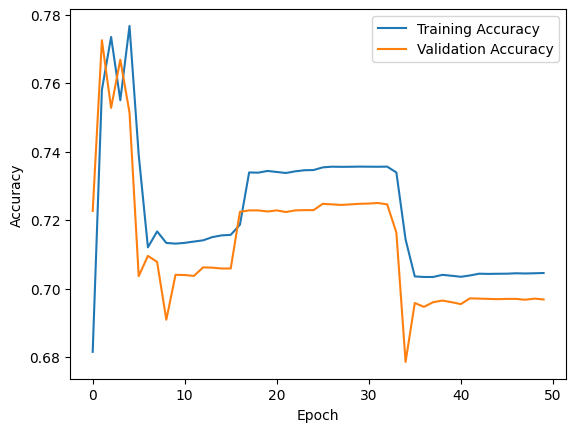

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.model_selection import train_test_split

# Create a simple binary classification model using Keras
model = Sequential()
model.add(Dense(units=20, input_dim=15, activation='sigmoid'))
model.add(Dense(units=15, activation='sigmoid'))
model.add(Dense(units=10, activation='sigmoid'))
model.add(Dense(units=1, activation='sigmoid'))
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model and store the training history
history = model.fit(X_train, y_train, epochs=50, validation_data=(X_test, y_test), verbose=0)

print(history)

# Access training history
training_accuracy = history.history['accuracy']
validation_accuracy = history.history['val_accuracy']

# Plot the training accuracy and validation accuracy over epochs
plt.plot(training_accuracy, label='Training Accuracy')
plt.plot(validation_accuracy, label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


In [ ]:
print(f'Training accuracy of our model is {training_accuracy[-1]}')
print(f'Validation accuracy of our model is {validation_accuracy[-1]}')

Training accuracy of our model is 0.6929863095283508
Validation accuracy of our model is 0.6854445338249207


In [ ]:
# Summary of our model to better understand the paramneters and the layers
model.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_20 (Dense)            (None, 20)                320       
                                                                 
 dense_21 (Dense)            (None, 15)                315       
                                                                 
 dense_22 (Dense)            (None, 10)                160       
                                                                 
 dense_23 (Dense)            (None, 1)                 11        
                                                                 
Total params: 806 (3.15 KB)
Trainable params: 806 (3.15 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
predictions = model.predict(X_test)
# Evaluate the accuracy
binary_predictions = (predictions > 0.5).astype(int)
accuracy = accuracy_score(y_test, binary_predictions)
print(f"Accuracy: {accuracy}")

391/391 [==============================] - 1s 2ms/step
Accuracy: 0.6854445066816036


# Now input the data so that our model could predict on that data

In [ ]:
import numpy as np

Machine = int(input("Enter Machine : "))
DebugSize = int(input("Enter DebugSize : "))
DebugRVA = int(input("Enter DebugRVA : "))
MajorImageVersion = int(input("Enter MajorImageVersion : "))
MajorOSVersion = int(input("Enter MajorOSVersion : "))
ExportRVA = int(input("Enter ExportRVA : "))
ExportSize = int(input("Enter ExportSize : "))
IatVRA = int(input(" Enter IatVRA : "))
MajorLinkerVersion = int(input("Enter MajorLinkerVersion : "))
MinorLinkerVersion = int(input("Enter MinorLinkerVersion : "))
NumberOfSections = int(input("Enter NumberOfSections : "))
SizeOfStackReserve = int(input("Enter SizeOfStackReserve : "))
DIICharacteristics = int(input("Enter DIICharacteristics : "))
ResourceSize = int(input("Enter ResourceSize : "))
BitcoinAddresses = int(input("Enter BitcoinAddresses : "))

inp = [Machine, DebugSize, DebugRVA, MajorImageVersion, MajorOSVersion, ExportRVA, ExportSize, IatVRA, MajorLinkerVersion,
       MinorLinkerVersion, NumberOfSections, SizeOfStackReserve, DIICharacteristics, ResourceSize, BitcoinAddresses]

# inp = [332,0,0,0,4,0,0,8192,8,0,3,1048576,34112,672,0]

user_input_array = np.array(inp).reshape(1, 15)
# print (user_input_array)

prediction = model_KNN.predict(user_input_array)

print(f"Predicted Probability: {prediction}")

Enter Machine : 332
Enter DebugSize : 0
Enter DebugRVA : 0
Enter MajorImageVersion : 0
Enter MajorOSVersion : 4
Enter ExportRVA : 0
Enter ExportSize : 0
 Enter IatVRA : 8192
Enter MajorLinkerVersion : 8
Enter MinorLinkerVersion : 0
Enter NumberOfSections : 3
Enter SizeOfStackReserve : 1048576
Enter DIICharacteristics : 34112
Enter ResourceSize : 672
Enter BitcoinAddresses : 0
Predicted Probability: [1]


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
